
## STOCHASTIC MODELING
MODULE 5 | LESSON 2


---

# **Q-FUNCTION**

|  |  |
|:---|:---|
|**Reading Time** |  70min |
|**Prior Knowledge** |Markov process, Dynamic programming, value function  |
|**Keywords** |Q-function, gambler's problem


---

*In this notebook, we extend some concepts of dynamic programming in a reinforcement learning framework with Python. We will go from the value function to the q-function. Q-function is one of the most useful tools to compute the optimal actions in many reinforcement learning problems.*

## **1. Q-Function**

While value function iteration is a useful algorithm, RL setups mostly consider an alternative tool to take us to the optimal actions.

Let $Q(s,a)$ denote the expected discounted future reward from starting in state $s$, taking $a$ as our first action, and then continuing optimally. This function is similar to $v$, except that $Q$ specifies the first action, and that action could potentially be sub-optimal (we are going to compute $Q$ for each possible action in each state). Formally,
$$
\begin{align}
Q(s,a) = \sum_{s'}\mathbb{P}(s'|s,a) \big[ r(s',s,a) +  \gamma\ Q(s',a') \big]
\end{align}
$$
The $Q$-value of being in state $s$ and taking action $a$ as the reward, $r(s',s,a)$, plus the discounted expected value of the future rewards. We get the expected value of the future by taking an expectation over all possible next states, $s'$. In each state $s'$, we need to know the value of behaving optimally. We can get that by choosing, in each $s'$, the action $a'$ that maximizes $Q(s',a')$, so that we reach the optimal function:
$$
\begin{align}
Q^*(s,a) = \sum_{s'}\mathbb{P}(s'|s,a) \big[ r(s',s,a) +  \gamma\ \underset{a'\in\mathcal{A}}{\max} Q^*(s',a') \big]
\end{align}
$$
A convenient aspect of this approach is that if you know $Q^*$, then it is easy to compute the optimal action in a state:
$$
\begin{align}
\Pi^*(s) = \arg\underset{a\in\mathcal{A}}{\max} Q^*(s,a)
\end{align}
$$
All you have to do is take the action that gives the largest $Q$-value in that state. We can sketch the iteration over the $Q$-function as follows:

Begin with some flat guess, say $Q^{(0)}(s,a)=0$, for all $s,a$.
1. Compute $Q^{(0,*)}(s) = \underset{a\in\mathcal{A}}{\max}Q^{(0)}(s,a)$.
2. Compute $Q^{(1)}(s,a) = \sum_{s'}\mathbb{P}(s'|s,a)\big[ r(s',s,a) +  \gamma\ Q^{(0,*)}(s')\big]$.
3. Stop if $Q^{(0)}$ and $Q^{(1)}$ are close enough. Otherwise, set $Q^{(0)}=Q^{(1)}$ and return to step 1.

The code below solves the investor's problem we introduced above using iteration over the $Q$-function.

To find the optimal $Q$-function, we first find what is the estimated optimal action for each state and store it in a matrix, given the inherited $Q$-function in the previous iteration. Then, we find the updated $Q$-function values for each state-action pair. Those values are the selling price when the investor sells the asset and the expected future dividends plus the discounted optimal state-action $Q$-values in each state when the investor holds the asset. We stop the iteration after reaching the convergence criterion or the iteration limit. Because the state-action space has two dimensions we just refine the convergence criterion to:
$$
\begin{align}
\underset{s,a}{\max}|Q^{(1)}(s,a)-Q^{(0)}(s,a)| < \epsilon
\end{align}
$$<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

In [1]:
# Import libraries to use in this notebook
import matplotlib.pyplot as plt
import numpy as np

# SOLVING THE INVESTOR'S PROBLEM
# Step 1. Set up the dividend Markov process
N = 11  # Number of dividend states
A = 2  # Number of actions
S_MIN = 0.0  # Minimum dividend
S_MAX = 10.0  # Maximum dividend
S_GRID = np.linspace(S_MIN, S_MAX, N)  # Array of possible dividend realizations

# Build the transition matrix
P = np.zeros((N, N))
P[0, 0] = 1.0  # State 0 is absorbing
P[N - 1, N - 2] = 1  # State N bounces back
# In other states dividends decrease or increase in one step with equal pr.
for ss in range(1, N - 1):
    P[ss, ss - 1] = 0.5
    P[ss, ss + 1] = 0.5


# SOLVING THE INVESTOR'S PROBLEM
# Step 2. Set up the parameters of the DP problem

GAMMA = 0.75

SELLING_PRICE = 15.0

ITETOL = 1e-4
ITEMAX = 200

value = np.zeros((N))
policy = np.zeros((N))

# SOLVING THE INVESTOR'S PROBLEM WITH Q-FUNCTION

qvalue = np.zeros((N, A))

for ite in range(ITEMAX):
    qvalue_old = qvalue.copy()
    qvalue = np.zeros((N, A))
    maxv = np.zeros(N)
    for ss in range(N):
        maxv[ss] = np.max(qvalue_old[ss, :])
    for ss in range(N):
        qvalue[ss, 0] = np.dot(P[ss, :], S_GRID[ss] + GAMMA * maxv)
        qvalue[ss, 1] = SELLING_PRICE
    if np.max(np.absolute(np.subtract(qvalue_old, qvalue))) < ITETOL:
        break

print(ite + 1)

qvalue_star = np.max(qvalue[:, :], axis=1)
policy = np.argmax(qvalue[:, :], axis=1)

37


Let's plot again the outcomes from this iteration. Observe how the function $\underset{a\in\mathcal{A}}{\max} Q^*(s,a)$ and the optimal policies are both identical to the value function we obtained above.

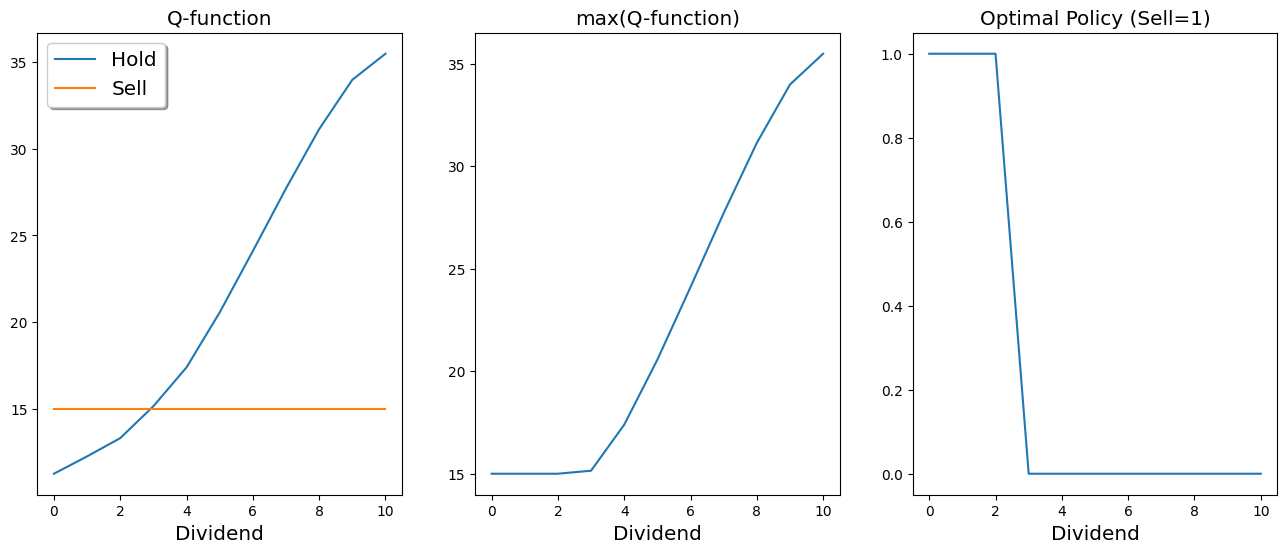

In [2]:
plt.subplot(1, 3, 1)
plt.plot(S_GRID, qvalue[:, 0], label="Hold")
plt.plot(S_GRID, qvalue[:, 1], label="Sell")
plt.title("Q-function", fontsize="x-large")
legend = plt.legend(loc="upper left", shadow=True, fontsize="x-large")
plt.xlabel("Dividend", fontsize="x-large")

plt.subplot(1, 3, 2)
plt.plot(S_GRID, qvalue_star)
plt.xlabel("Dividend", fontsize="x-large")

plt.title("max(Q-function)", fontsize="x-large")
plt.subplot(1, 3, 3)
plt.plot(S_GRID, policy)
plt.title("Optimal Policy (Sell=1)", fontsize="x-large")
plt.xlabel("Dividend", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(16, 6)
plt.show()

Let's keep on studying the tools of dynamic programming with the following problem.

## **2. A Gambler's Problem**

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, the gambler wins as many
dollars as they bet on that flip. If tails, they lose their bet. The game ends when the gambler wins by reaching a target of \$100 or loses by running out of money. On each flip, the gambler must decide what portion of their capital to put at stake, in integer numbers of dollars.

The state is the gambler's capital, $s\in\{0, 1, 2,..., 99, 100\}$ and the actions are stakes, $a\in\{1, . . . , \min(s, 100− s)\}$. The reward is zero on all transitions except those on which the gambler reaches their goal, when it is +1. Because the gambler just cares about the terminal value of the game, either reaching \$100 or \$0, we can forget about the discounting parameter $\gamma$.

The value function of this game then will return the optimal probability of winning from each state. A policy maps each level of capital accumulated by the gambler to a given bet. If $p_H$ denotes the probability of the coin coming up heads and is known, then the entire problem is known and it can be solved, for instance, by value iteration.

The blocks of code below show how to solve the problem. First, we initialize the DP problem. We set $p_H=0.4$, and the number of states to 101 (taking into account the terminal state of 0). We fix that the terminal value of reaching the goal of 100 is 1.

In [9]:
# GAMBLER'S PROBLEM. SETTING UP THE PROBLEM

N = 101
P_H = 0.25

ITETOL = 1e-4
ITEMAX = 200

value = np.zeros((N))
value[100] = 50

policy = np.zeros((N))

Now, we proceed with the value iteration algorithm. For each level of the gambler's capital, we compute the continuation value attached to each outcome. Notice that there is no reward attached to each action unless we reach state $100$, for which we set the reward of 1 in advance. Therefore, for each bet $a$, the next state is a capital level $s+a$ with probability $p_H$, and a level $s-a$ otherwise. The updated value function is the maximum across all values attached to each potential outcome. 

In [10]:
# GAMBLER'S PROBLEM. VALUE ITERATION

for ite in range(ITEMAX):
    value_old = value.copy()
    value = np.zeros((N))
    value[100] = 1
    for ss in range(1, N - 1):
        val = np.zeros(N - 1)
        for aa in range(1, min(ss, N - 1 - ss) + 1):
            val[aa] = (1 - P_H) * value_old[ss - aa] + P_H * value_old[ss + aa]
        value[ss] = np.max(val)
        policy[ss] = np.argmax(val)
    if np.max(np.absolute(np.subtract(value_old, value))) < ITETOL:
        break

print(ite + 1)

200


Let's plot again the outcomes from the iteration.

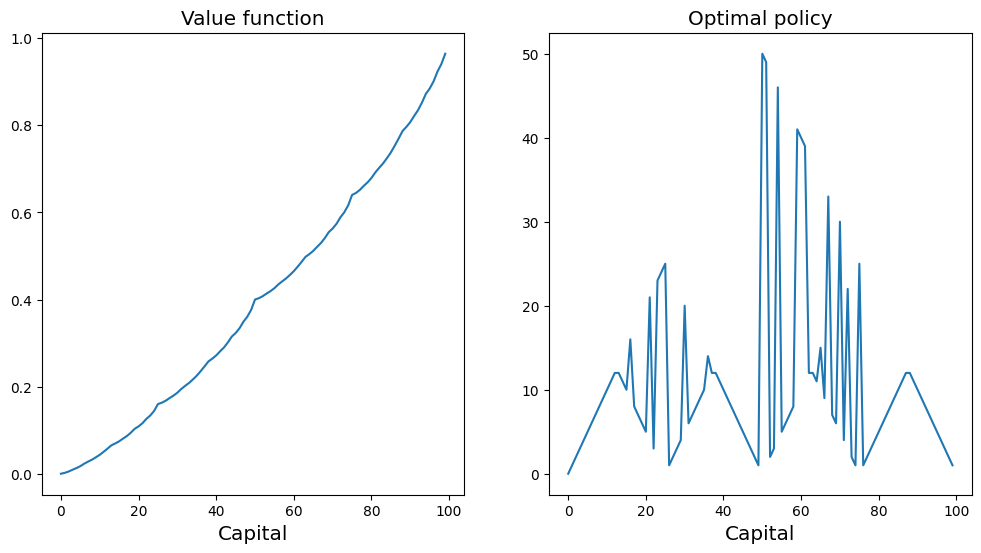

In [5]:
plt.subplot(1, 2, 1)
plt.plot(value[0:100])
plt.title("Value function", fontsize="x-large")
plt.xlabel("Capital", fontsize="x-large")
plt.subplot(1, 2, 2)
plt.plot(policy[0:100])
plt.title("Optimal policy", fontsize="x-large")
plt.xlabel("Capital", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

Notice that the optimal policies to the gambler's problem yields multiple optimal policies (stakes) in many of the states (that explains the somewhat strange shape of the optimal policy). The multiplicity arises because, starting at a given amount of money, there exist multiple paths to reach the goal of \$100 with the same probability. That is, the gambler can opt for successive small bets that generate low downward deviations or large bets that can bring the agent closer to the target in a few steps. You can check how these results change with different choices of the probability of heads and the state-space.

In [6]:
# Notice that there exist a multiplicity of optimal policies in most states
for ss in range(1, N - 1):
    val = np.zeros(N - 1)
    for aa in range(1, min(ss, N - 1 - ss) + 1):
        val[aa] = (1 - P_H) * value[ss - aa] + P_H * value[ss + aa]
    occurrences = np.where(val == np.max(val))
    print(ss, occurrences)

1 (array([1]),)
2 (array([2]),)
3 (array([3]),)
4 (array([4]),)
5 (array([5]),)
6 (array([6]),)
7 (array([7]),)
8 (array([8]),)
9 (array([9]),)
10 (array([10]),)
11 (array([11]),)
12 (array([12]),)
13 (array([12, 13]),)
14 (array([11, 14]),)
15 (array([10, 15]),)
16 (array([ 9, 16]),)
17 (array([17]),)
18 (array([ 7, 18]),)
19 (array([ 6, 19]),)
20 (array([5]),)
21 (array([21]),)
22 (array([ 3, 22]),)
23 (array([ 2, 23]),)
24 (array([24]),)
25 (array([25]),)
26 (array([ 1, 24, 26]),)
27 (array([ 2, 23, 27]),)
28 (array([ 3, 22, 28]),)
29 (array([ 4, 21, 29]),)
30 (array([20]),)
31 (array([ 6, 19, 31]),)
32 (array([ 7, 18]),)
33 (array([8]),)
34 (array([9]),)
35 (array([10, 15, 35]),)
36 (array([14]),)
37 (array([12, 13]),)
38 (array([12, 38]),)
39 (array([11]),)
40 (array([10, 40]),)
41 (array([9]),)
42 (array([ 8, 42]),)
43 (array([7]),)
44 (array([6]),)
45 (array([5]),)
46 (array([ 4, 46]),)
47 (array([ 3, 47]),)
48 (array([2]),)
49 (array([ 1, 49]),)
50 (array([50]),)
51 (array([49]

The code below illustrates how to solve the problem with optimization of the $Q$ function. In that case, the $Q$ function yields the optimal probability of reaching the goal of \$100 for each state and for each potential stake to put in place by the gambler. By now, you should be able to verify the code and that we reach the same results as with value iteration.

In [11]:
# GAMBLER'S PROBLEM. Q ITERATION

qvalue = np.zeros((N, N - 1))

for ite in range(ITEMAX):
    qvalue_old = qvalue.copy()
    qvalue = np.zeros((N, N - 1))
    maxv = np.zeros(N)
    for ss in range(1, N - 1):
        maxv[ss] = np.max(qvalue_old[ss, :])
    for ss in range(1, N - 1):
        for aa in range(1, min(ss, N - 1 - ss) + 1):
            qvalue[ss, aa] = (1 - P_H) * maxv[ss - aa] + P_H * (
                1 * (ss + aa == N - 1) + maxv[ss + aa]
            )
    if np.max(np.absolute(np.subtract(qvalue_old, qvalue))) < ITETOL:
        break

print(ite + 1)

qvalue_star = np.max(qvalue, axis=1)
policy = np.argmax(qvalue, axis=1)

15


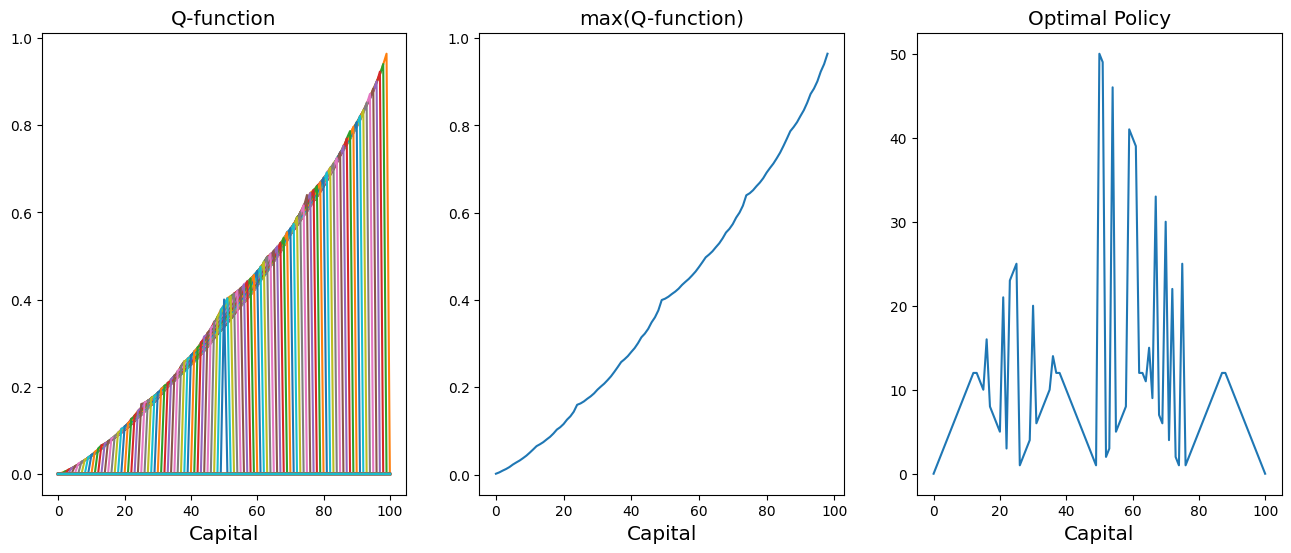

In [8]:
plt.subplot(1, 3, 1)
plt.plot(qvalue[:, :])
plt.title("Q-function", fontsize="x-large")
plt.xlabel("Capital", fontsize="x-large")
plt.subplot(1, 3, 2)
plt.plot(qvalue_star[1:100])
plt.title("max(Q-function)", fontsize="x-large")
plt.xlabel("Capital", fontsize="x-large")
plt.subplot(1, 3, 3)
plt.plot(np.argmax(qvalue[:, :], axis=1))
plt.title("Optimal Policy", fontsize="x-large")
plt.xlabel("Capital", fontsize="x-large")

fig = plt.gcf()
fig.set_size_inches(16, 6)
plt.show()

In [ ]:
# Notice that there exist a multiplicity of optimal policies in most states
for ss in range(1, N - 1):
    occurrences = np.where(qvalue[ss, :] == np.max(qvalue[ss, :]))
    print(ss, occurrences)

## **3. Conclusion**

In this lesson, we have worked through the concept of q-value function and its application to the gambler's problem. In the next lesson, we will introduce an alternative way to analyze the optimal course of action for the agent in a dynamic programming problem, the policy iteration methodology.

See you there!

---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
